Rivets and Eccentric loading

In [47]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import pi, radians, degrees, dist, atan, cos, sin, hypot, pow

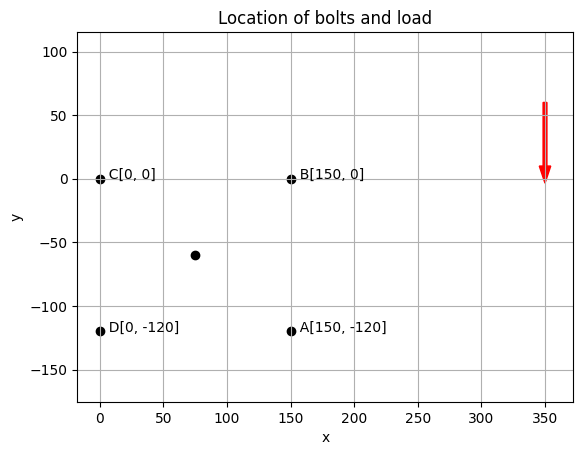

In [48]:
coorA = [150,-120]
coorB = [150,0]
coorC = [0,0]
coorD = [0,-120]
centroid = [75,-60]
loadLocation = [350,0]
PLoad = 16000

data = np.array([coorA,coorB,coorC,coorD,centroid])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
# ax.hlines(Fproof,0,10000)
# ax.hlines(Fi,0,10000)

ax.set(xlabel='x', ylabel='y',
       title='Location of bolts and load')

ax.text(coorA[0],coorA[1],f'  A{coorA}')
ax.text(coorB[0],coorB[1],f'  B{coorB}')
ax.text(coorC[0],coorC[1],f'  C{coorC}')
ax.text(coorD[0],coorD[1],f'  D{coorD}')

plt.axis('equal')
plt.show()

In [49]:
print('1. Centroid from Bolt C')
# d = 16
# Area = pi()*pow(d,2)/4
# If area is same, just use A
xBar = (coorA[0]+coorB[0]+coorC[0]+coorD[0])/4
yBar = (coorA[1]+coorB[1]+coorC[1]+coorD[1])/4
print(f'x bar = {xBar}')
print(f'y bar = {yBar}')
print(f'Centroid is ({xBar},{yBar}) from Bolt C')

1. Centroid from Bolt C
x bar = 75.0
y bar = -60.0
Centroid is (75.0,-60.0) from Bolt C


In [50]:
print('2. Find distance between bolts and centroid')
Centroid = [xBar, yBar]
rA = dist(coorA, Centroid)
print(f'rA = {rA}')

2. Find distance between bolts and centroid
rA = 96.04686356149273


In [51]:
degrees(atan(60/75))

38.659808254090095

In [52]:
print('3. Find Tangential Force and Direct Shear')
DirectShear = PLoad/4
CentroidToLoad = 75+50+300
Fta = round((PLoad*CentroidToLoad*rA)/(4*pow(rA,2)),0)
print(f'Tangential Force at A, Fta = {Fta:.1f}N')
print(f'Direct Shear at A, Fsa = {DirectShear:.1f}N')

3. Find Tangential Force and Direct Shear
Tangential Force at A, Fta = 17700.0N
Direct Shear at A, Fsa = 4000.0N


4. Resultant load at each bolt


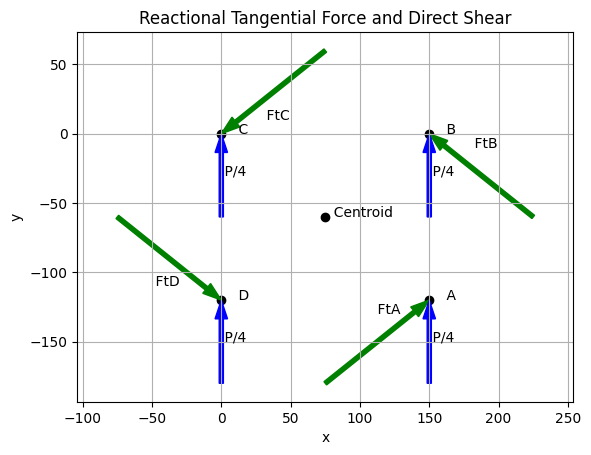

In [53]:
print('4. Resultant load at each bolt')

fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
# ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
ax.arrow(coorA[0]-75,coorA[1]-60, 75,60,width=3,color='g', length_includes_head='False')
ax.arrow(coorB[0]+75,coorB[1]-60, -75,60,width=3,color='g', length_includes_head='False')
ax.arrow(coorC[0]+75,coorC[1]+60, -75,-60,width=3,color='g', length_includes_head='False')
ax.arrow(coorD[0]-75,coorD[1]+60, 75,-60,width=3,color='g', length_includes_head='False')

# Direct Shear
for i in [coorA,coorB,coorC,coorD]:
       ax.arrow(i[0],i[1]-60, 0,60,width=3,color='b', length_includes_head='False')
       # ax.text(i[0],i[1],f'    {i}')

ax.set(xlabel='x', ylabel='y',
       title='Reactional Tangential Force and Direct Shear')

coorBolts = [coorA,coorB,coorC,coorD]
boltLabel = ['A','B','C','D']
for i in range(4):
       ax.text(coorBolts[i][0],coorBolts[i][1],f'    {boltLabel[i]}')
       ax.text(coorBolts[i][0]-10,coorBolts[i][1]-30,f'    P/4')

ax.text(centroid[0],centroid[1],f'  Centroid')
ax.text(coorBolts[0][0]-50,coorBolts[0][1]-10,f'    FtA')
ax.text(coorBolts[1][0]+20,coorBolts[1][1]-10,f'    FtB')
ax.text(coorBolts[2][0]+20,coorBolts[2][1]+10,f'    FtC')
ax.text(coorBolts[3][0]-60,coorBolts[3][1]+10,f'    FtD')

plt.axis('equal')
plt.show()

In [54]:
tangential_angle=round(degrees(atan(75/60)),2)
print(f'Angle of Tangential Force, θ = {tangential_angle}°')

Angle of Tangential Force, θ = 51.34°


In [55]:
Ftb=Fta
Ftc=Fta
Ftd=Fta
F_ax=round(Fta*cos(radians(tangential_angle)),0)
F_ay=round(Fta*sin(radians(tangential_angle)),0)+DirectShear
print(f'F_ax= {F_ax}N')
print(f'F_ay= {F_ay}N')
F_A = round(hypot(F_ax,F_ay),0)
print(f'F_A= {F_A}N')
F_B=F_A
print(f'F_B= {F_B}N')

F_ax= 11057.0N
F_ay= 17821.0N
F_A= 20972.0N
F_B= 20972.0N


In [56]:
F_Cx=round(Fta*cos(radians(tangential_angle)),0)
F_Cy=round(Fta*sin(radians(tangential_angle)),0)-DirectShear
print(f'F_Cx= {F_Cx}N')
print(f'F_Cy= {F_Cy}N')
F_C=round(hypot(F_Cx,F_Cy),0)
print(f'F_C= {F_C}N')
F_D=F_C
print(f'F_D= {F_D}N')

F_Cx= 11057.0N
F_Cy= 9821.0N
F_C= 14789.0N
F_D= 14789.0N


ii) Maximum shearing stress

In [57]:
tau=round(F_A/(pi*pow(0.016,2)/4),2)
print(f'Maximum Shearing Stress, τ = {tau:.3e}N/m²')
print(f'={tau/1e6:.2f}MPa')

Maximum Shearing Stress, τ = 1.043e+08N/m²
=104.31MPa
